In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
from glob import glob

In [5]:
!make -f stages/test/makefile
%time !./stages_test

cat build/stages_test/stages_test.d build/stages_test/ramp_extractor.d build/stages_test/segment_generator.d build/stages_test/resources.d build/stages_test/units.d build/stages_test/random.d > build/stages_test/depends.mk
g++ -c -DTEST -g -Wall -Werror -msse2 -Wno-unused-variable -O2 -I. stages/test/stages_test.cc -o build/stages_test/stages_test.o
g++ -c -DTEST -g -Wall -Werror -msse2 -Wno-unused-variable -O2 -I. stages/segment_generator.cc -o build/stages_test/segment_generator.o
g++ -g -o stages_test build/stages_test/stages_test.o build/stages_test/ramp_extractor.o build/stages_test/segment_generator.o build/stages_test/resources.o build/stages_test/units.o build/stages_test/random.o  -lm -lprofiler -L/opt/local/lib
CPU times: user 30.7 ms, sys: 11.3 ms, total: 42 ms
Wall time: 1.38 s


In [6]:
new = {}
stock = {}
for fn in glob("stages_*wav"):
    n = wavfile.read(fn)[1]
    new[fn[:-4]] = n
    try:
        s = wavfile.read(f"stages_test_reference/{fn}")[1]
        stock[fn[:-4]] = s
    except:
        print(f"stock file not found for {fn}; skipping")
        continue
    if (s==n).all():
        print(f"✅ {fn}")
    else:
        print(f"❌ {fn}")
        for i, label in enumerate(["gate", "value", "segment", "phase"]):
            if (s.T[i] == n.T[i]).all():
                print(f"\t✅ {label}")
            else:
                print(f"\t❌ {label}")
                plt.figure()
                plt.plot(s.T[i], label="old")
                plt.plot(n.T[i], label="new")
                plt.title(f"{fn} - {label}")
                plt.legend()

✅ stages_timed_pulse.wav
✅ stages_single_decay.wav
✅ stages_free_running_lfo.wav
✅ stages_portamento.wav
✅ stages_two_step.wav
✅ stages_zero.wav
✅ stages_tap_lfo.wav
✅ stages_delay.wav
✅ stages_sh.wav
✅ stages_gate.wav
✅ stages_adsr.wav


In [7]:
new.keys()

dict_keys(['stages_timed_pulse', 'stages_single_decay', 'stages_free_running_lfo', 'stages_portamento', 'stages_two_step', 'stages_zero', 'stages_tap_lfo', 'stages_delay', 'stages_sh', 'stages_gate', 'stages_adsr'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
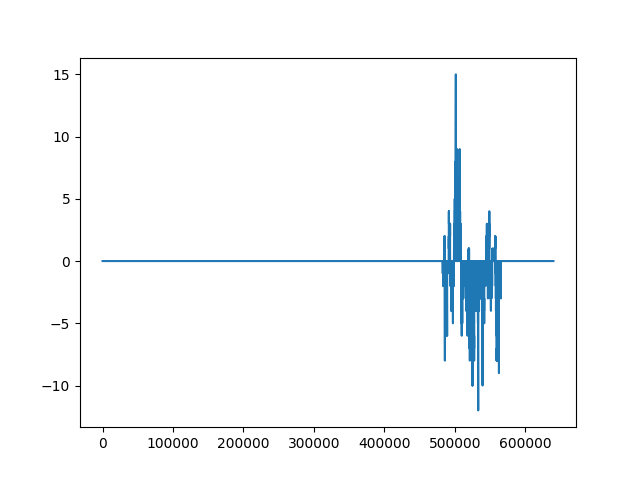

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
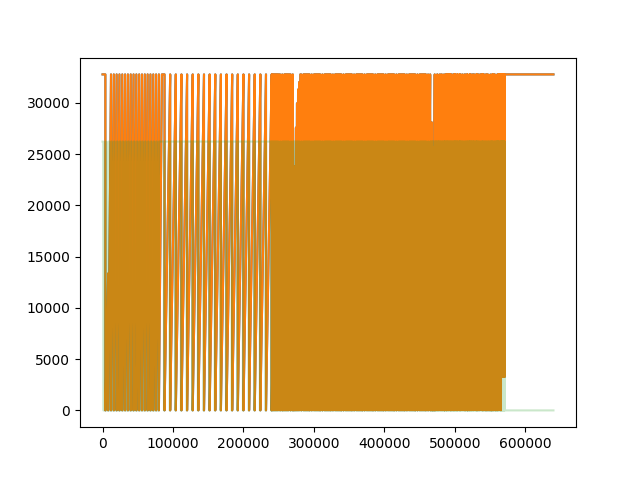

In [5]:
#start = 565475
#end = 565625
start = 0
end = -1
plt.figure()
plt.plot(new["stages_tap_lfo"].T[3] - stock["stages_tap_lfo"].T[3])
plt.figure()
plt.plot(stock["stages_tap_lfo"].T[3][start:end])
plt.plot(new["stages_tap_lfo"].T[3][start:end])
plt.plot(new["stages_tap_lfo"].T[0][start:end], alpha=0.25)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
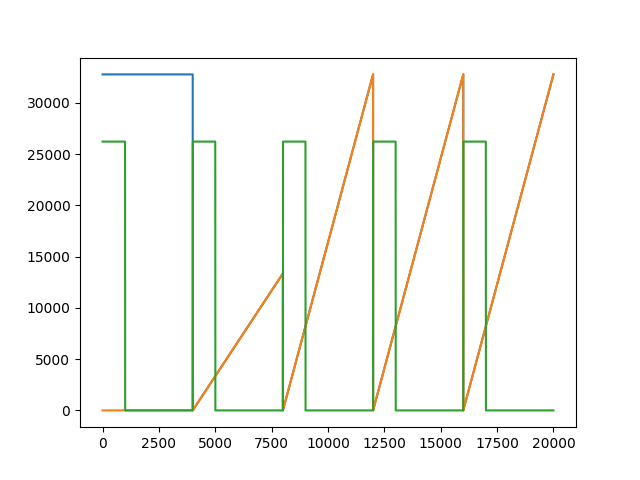

In [10]:
start = 0
end = 20000
plt.figure()
plt.plot(stock["stages_tap_lfo"].T[3][start:end])
plt.plot(new["stages_tap_lfo"].T[3][start:end])
plt.plot(new["stages_tap_lfo"].T[0][start:end])

In [64]:
plt.close('all')